In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#file upload

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
#to dislay rows

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#to check no:of rows and columns in given data frame

In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Preprocessing
#To check missing values

In [ ]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#No missing values found
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


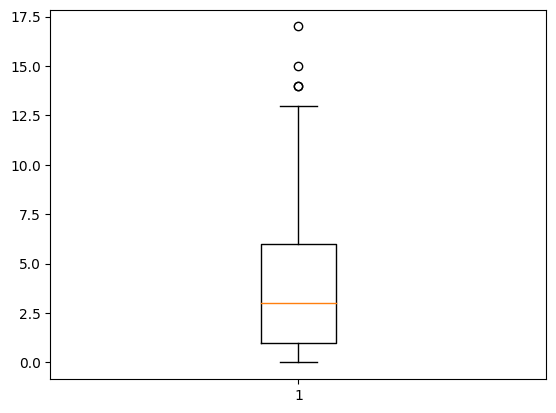

In [ ]:
#Check Outliers
plt.boxplot(data['Pregnancies'])
plt.show()

In [ ]:
# Outlier Detection using percentile
lower = data['Pregnancies'].quantile(0.05)
upper = data['Pregnancies'].quantile(0.95)
outliers_percentile = data[((data['Pregnancies'] < lower) | (data['Pregnancies'] > upper))]

In [ ]:
print(lower,upper)

0.0 10.0


In [ ]:
#Transform outliers using log transformation  #It is anoutlier handling technique
data['Pregnancies'] = np.log10(data['Pregnancies'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


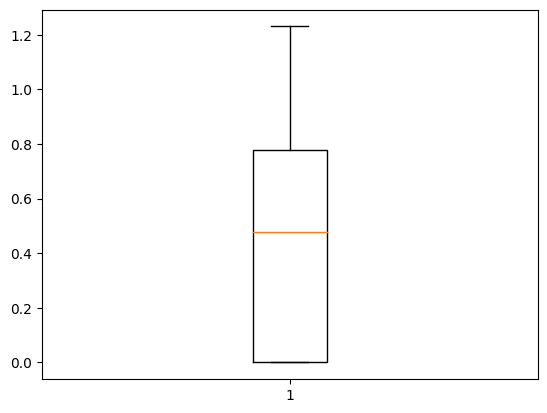

In [ ]:
plt.boxplot(data['Pregnancies'])
plt.show()

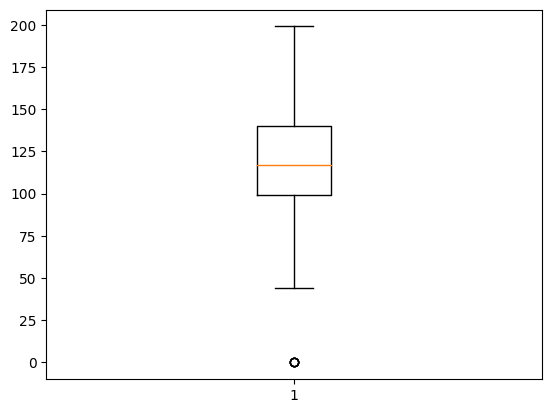

In [ ]:
plt.boxplot(data['Glucose'])
plt.show()

In [ ]:
# Transform outliers in Glucose using log transformation
data['Glucose'] = np.log10(data['Glucose'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


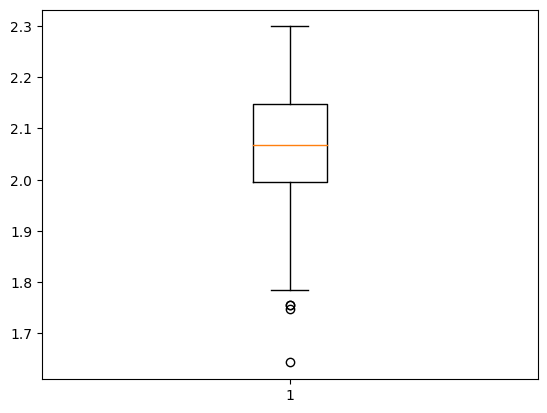

In [ ]:
plt.boxplot(data['Glucose'])
plt.show()

In [ ]:
#check outliers in BloddPressure using boxplot

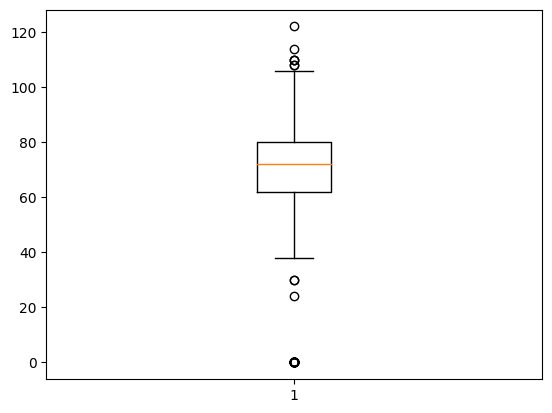

In [ ]:
plt.boxplot(data['BloodPressure'])
plt.show()

In [ ]:
#IQR
Q1=data['BloodPressure'].quantile(0.25)
Q2=data['BloodPressure'].quantile(0.5)
Q3=data['BloodPressure'].quantile(0.75)

In [ ]:
IQR=Q3-Q1
low=Q1-(1.5*IQR)
up=Q3+(1.5*IQR)
print(low,up)

35.0 107.0


In [ ]:
data[data['BloodPressure']>up].index

Int64Index([43, 84, 106, 177, 362, 549, 691], dtype='int64')

In [ ]:
data[data['BloodPressure']<low].index

Int64Index([  7,  15,  18,  49,  60,  78,  81, 125, 172, 193, 222, 261, 266,
            269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494,
            522, 533, 535, 589, 597, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')

In [ ]:
data=data.drop([ 43, 84, 106, 177, 362, 549, 691,7,  15,  18,  49,  60,  78,  81, 125, 172, 193, 222, 261, 266,
            269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494,
            522, 533, 535, 589, 597, 601, 604, 619, 643, 697, 703, 706])

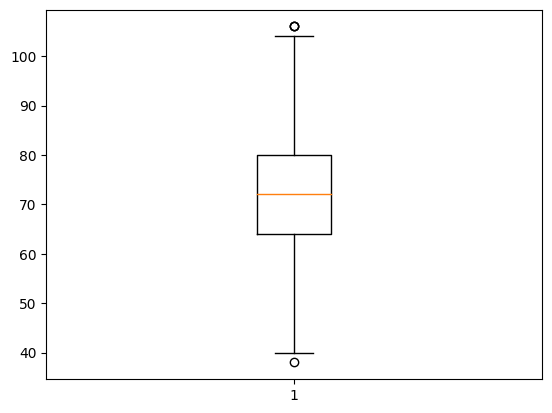

In [ ]:
plt.boxplot(data['BloodPressure'])
plt.show()

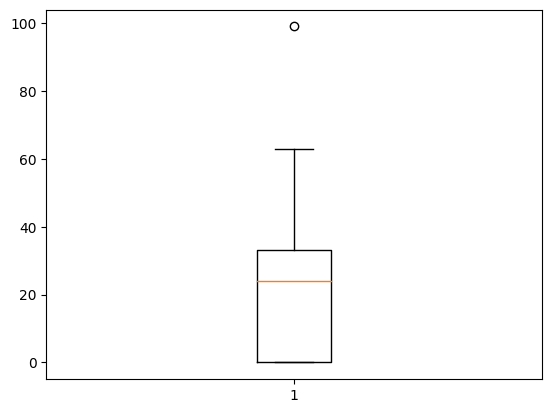

In [ ]:
plt.boxplot(data['SkinThickness'])
plt.show()

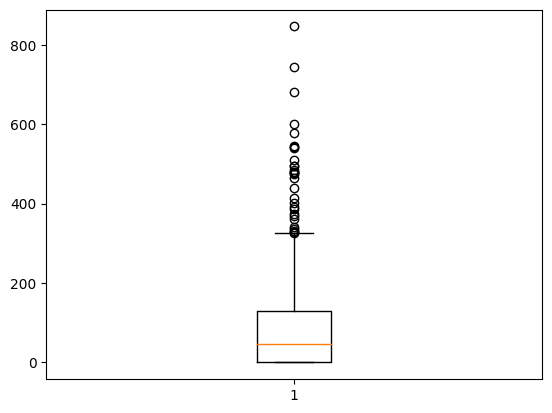

In [ ]:
plt.boxplot(data['Insulin'])
plt.show()

In [ ]:
#IQR
Q1=data['Insulin'].quantile(0.25)
Q2=data['Insulin'].quantile(0.5)
Q3=data['Insulin'].quantile(0.75)

In [ ]:
IQR=Q3-Q1
low=Q1-(1.5*IQR)
up=Q3+(1.5*IQR)
print(low,up)

-195.0 325.0


In [ ]:
data[data['Insulin']>up].index

Int64Index([  8,  13,  54, 111, 153, 186, 220, 228, 231, 247, 248, 258, 286,
            296, 370, 392, 409, 415, 480, 486, 519, 574, 584, 645, 655, 695,
            707, 710, 715, 753],
           dtype='int64')

In [ ]:
data[data['Insulin']<low].index

Int64Index([], dtype='int64')

In [ ]:
data=data.drop([ 48,  13,  54, 111, 153, 186, 220, 228, 231, 247, 248, 258, 286,
            296, 370, 392, 409, 415, 480, 486, 519, 574, 584, 645, 655, 695,
            707, 710, 715, 753])

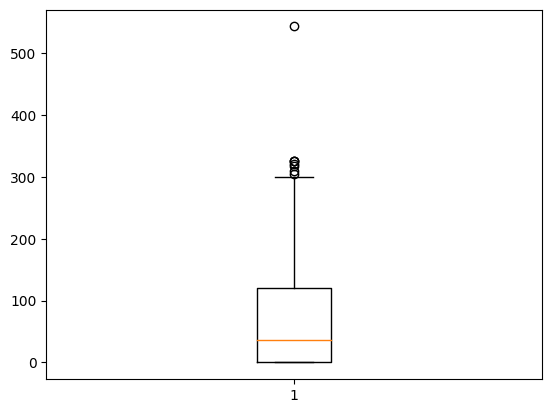

In [ ]:
plt.boxplot(data['Insulin'])
plt.show()

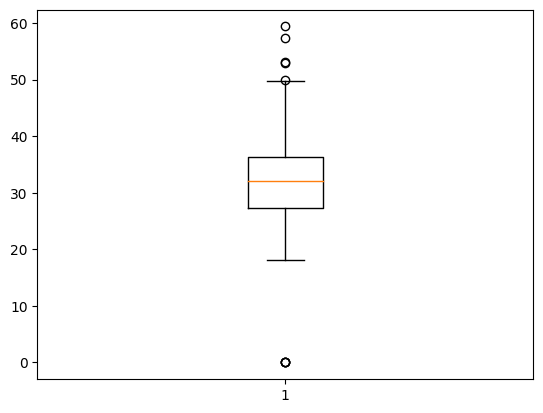

In [ ]:
plt.boxplot(data['BMI'])
plt.show()

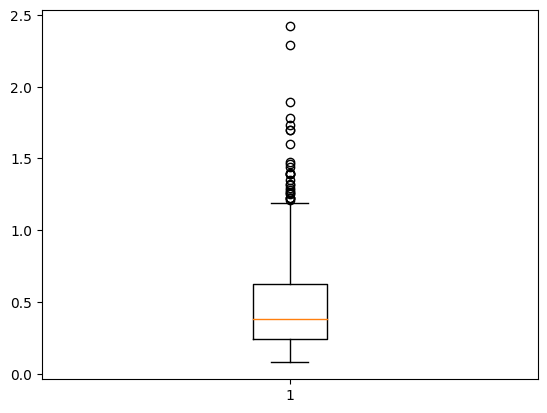

In [ ]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
#IQR
Q1=data['DiabetesPedigreeFunction'].quantile(0.25)
Q2=data['DiabetesPedigreeFunction'].quantile(0.5)
Q3=data['DiabetesPedigreeFunction'].quantile(0.75)

In [ ]:
IQR=Q3-Q1
low=Q1-(1.5*IQR)
up=Q3+(1.5*IQR)
print(low,up)

-0.3265 1.1975


In [ ]:
data[data['DiabetesPedigreeFunction']>up].index

Int64Index([  4,  12,  39,  45,  58, 100, 147, 187, 218, 243, 245, 259, 292,
            308, 330, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659,
            661],
           dtype='int64')

In [ ]:
data[data['DiabetesPedigreeFunction']<low].index

Int64Index([], dtype='int64')

In [ ]:
data=data.drop([ 4,  12,  39,  45,  58, 100, 147, 187, 218, 243, 245, 259, 292,
            308, 330, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659,
            66])

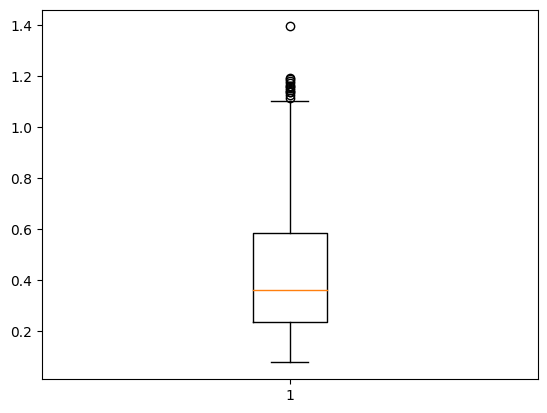

In [ ]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()

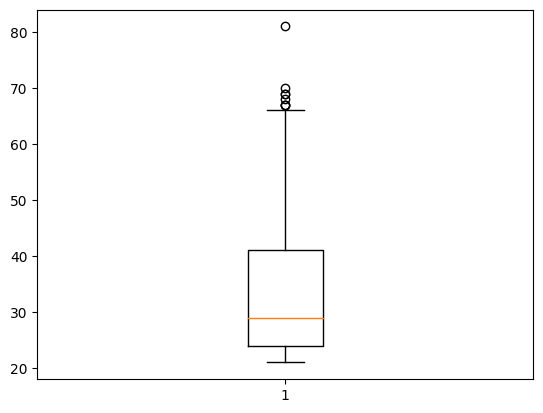

In [ ]:
plt.boxplot(data['Age'])
plt.show()

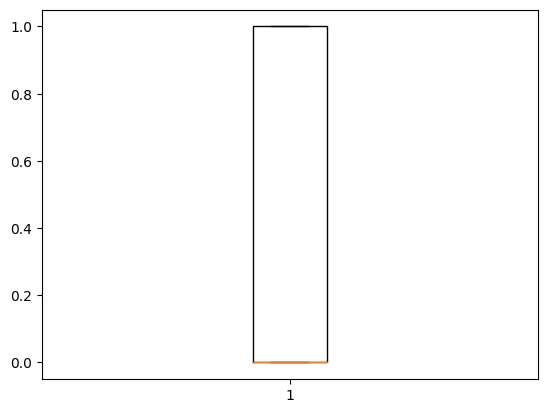

In [ ]:
plt.boxplot(data['Outcome'])
plt.show()

In [ ]:
#To check correlation

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.195025,0.281033,-0.110490,-0.093860,0.110331,-0.020681,0.549464,0.267496
Glucose,0.195025,1.000000,0.234027,0.039588,0.256148,0.185512,0.079283,0.267754,0.489348
BloodPressure,0.281033,0.234027,1.000000,0.026582,-0.029055,0.284358,0.028954,0.339261,0.185808
SkinThickness,-0.110490,0.039588,0.026582,1.000000,0.474713,0.384762,0.158673,-0.133282,0.060834
Insulin,-0.093860,0.256148,-0.029055,0.474713,1.000000,0.199065,0.194431,-0.078399,0.117178
BMI,0.110331,0.185512,0.284358,0.384762,0.199065,1.000000,0.150670,0.015290,0.271047
DiabetesPedigreeFunction,-0.020681,0.079283,0.028954,0.158673,0.194431,0.150670,1.000000,0.028737,0.176165
Age,0.549464,0.267754,0.339261,-0.133282,-0.078399,0.015290,0.028737,1.000000,0.257090
Outcome,0.267496,0.489348,0.185808,0.060834,0.117178,0.271047,0.176165,0.257090,1.000000


In [ ]:
#To view correlation

<Axes: >

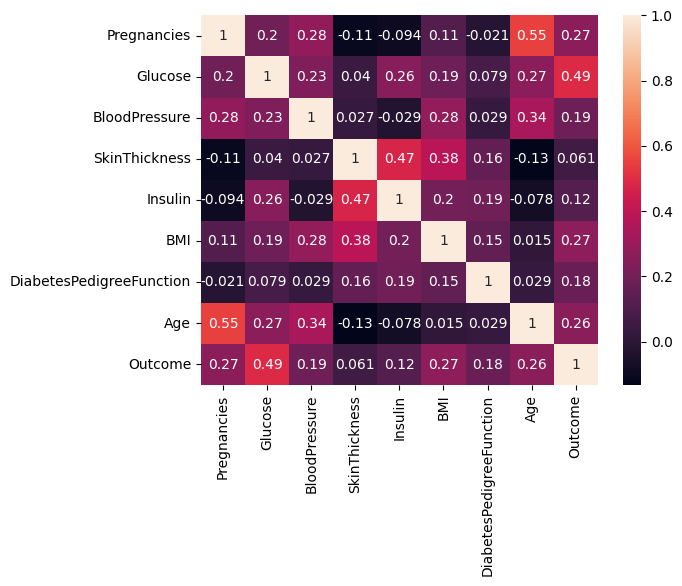

In [ ]:
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True)

<Axes: >

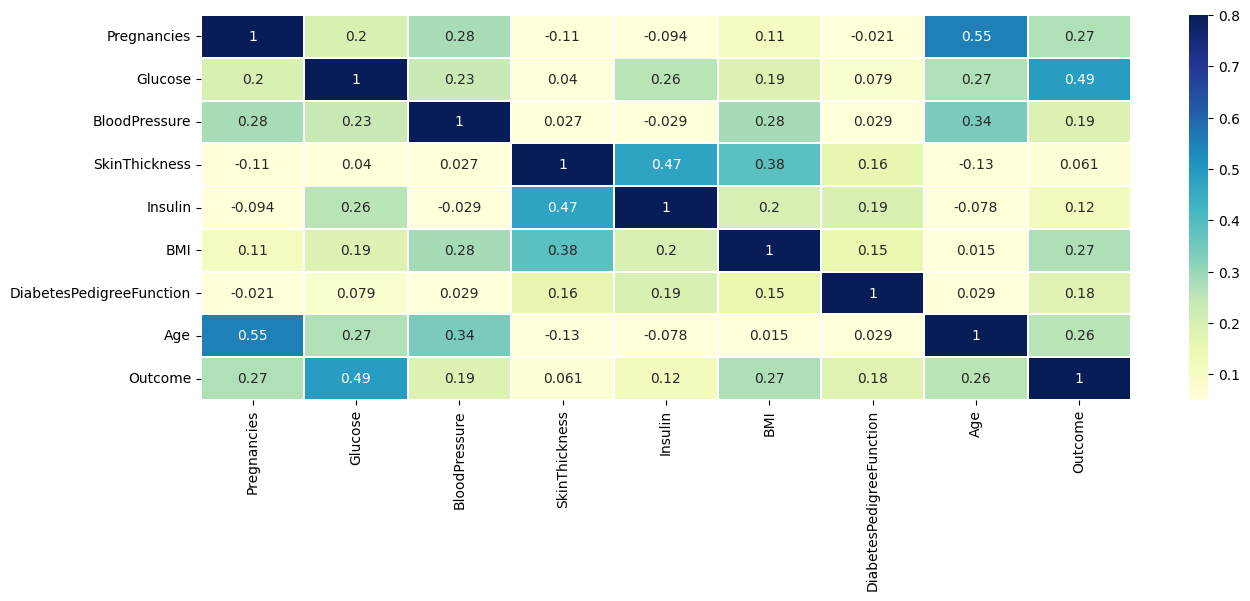

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix,annot=True,vmin=0.05,vmax=.8,linewidth=.2,cmap='YlGnBu')

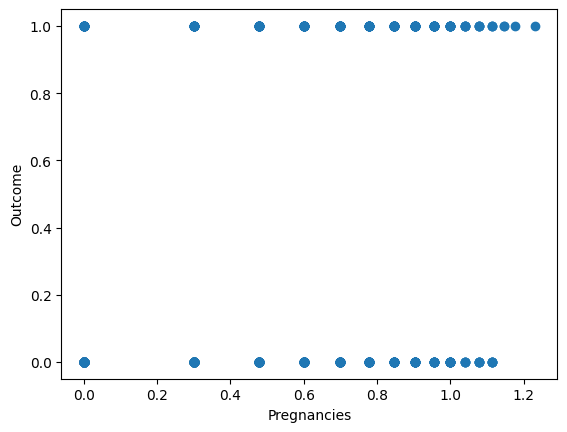

In [ ]:
#scatter plot
plt.scatter(data['Pregnancies'],data['Outcome'])
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

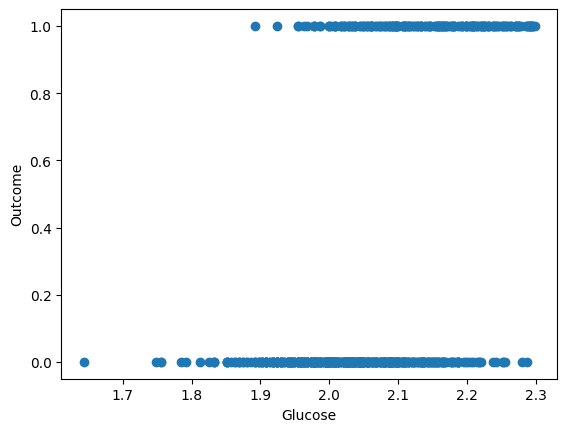

In [ ]:
plt.scatter(data['Glucose'],data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

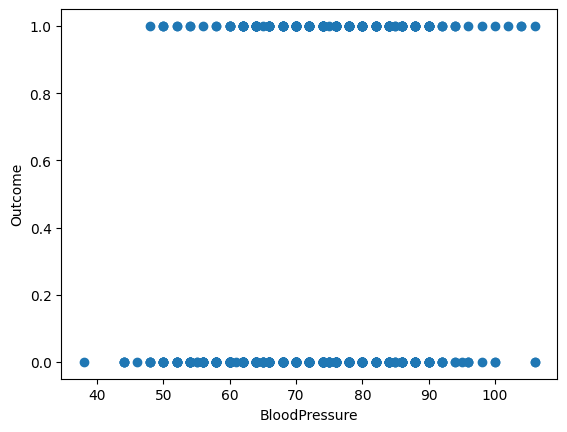

In [ ]:
plt.scatter(data['BloodPressure'],data['Outcome'])
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

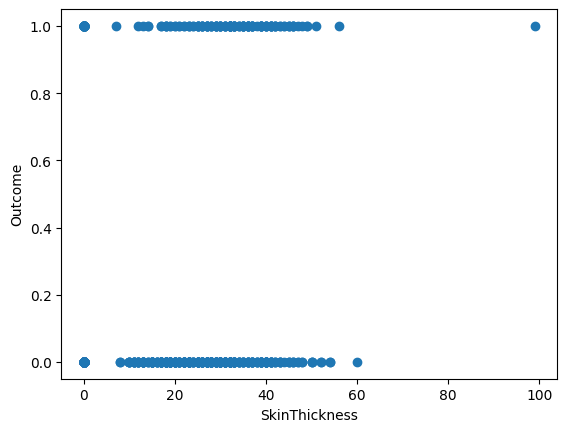

In [ ]:
plt.scatter(data['SkinThickness'],data['Outcome'])
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.show()

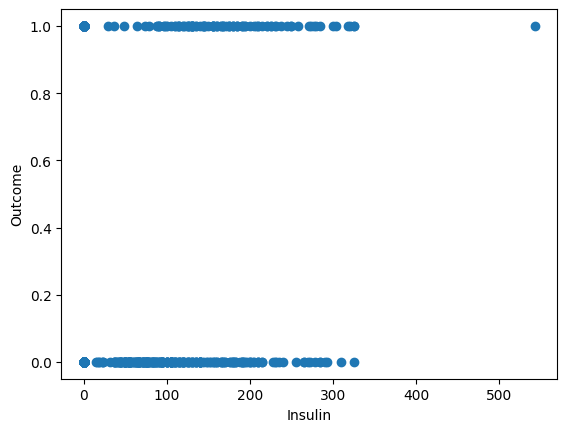

In [ ]:
plt.scatter(data['Insulin'],data['Outcome'])
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.show()

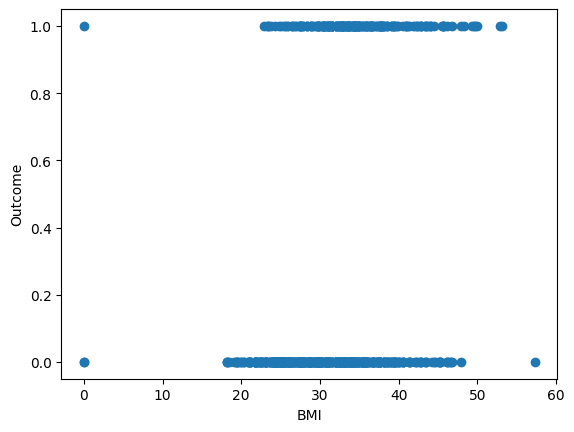

In [ ]:
plt.scatter(data['BMI'],data['Outcome'])
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

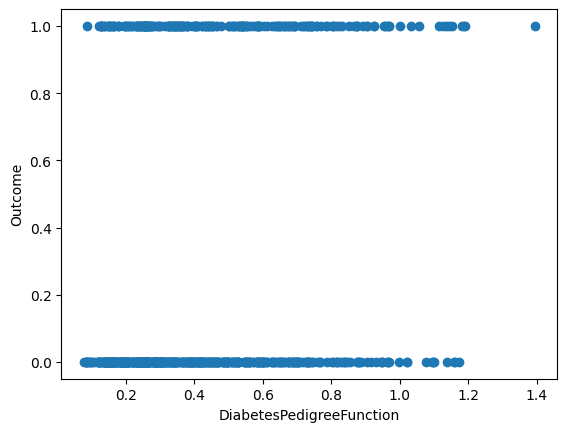

In [ ]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.show()

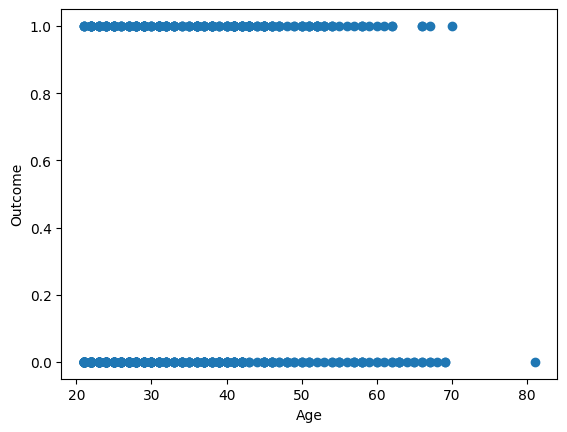

In [ ]:
plt.scatter(data['Age'],data['Outcome'])
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

In [ ]:
#Split train_data into dependent and independent features

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x=data.drop('Outcome',axis=1)  #dependent features

In [ ]:
y=data['Outcome']              #independent feature

In [ ]:
#minmax scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max=MinMaxScaler()

In [ ]:
x.loc[:,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=min_max.fit_transform(x[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

ValueError: ignored

In [ ]:
#splitting data as training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

ValueError: ignored

In [ ]:
y_pred=lr.predict(x_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)


In [ ]:
print(mse)

0.15227094992180118


In [ ]:
r2_score(y_test,y_pred)

0.3363621792517236

In [ ]:
#Classification

In [ ]:
#LogisticRegressin

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression()
lg_reg.fit(x_train,y_train)
y_pred=lg_reg.predict(x_test)

In [ ]:
#give accuracy

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7587412587412588

In [ ]:
confusion_matrix(y_test,y_pred)

array([[178,   6],
       [ 63,  39]])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
precision_score(y_test,y_pred)

0.8666666666666667